### 딥러닝을 가능케한 autograd

In [1]:
import torch

In [2]:
x=torch.tensor([1.], requires_grad=True)
print(x)

tensor([1.], requires_grad=True)


In [3]:
x=torch.tensor([1.])
print(x)
print(x.requires_grad)

x.requires_grad=True
print(x)
print(x.requires_grad)

tensor([1.])
False
tensor([1.], requires_grad=True)
True


In [4]:
x=torch.tensor([1.], requires_grad=True)
y=x**2
print(y)

print(x.grad)
y.backward()
print(x.grad) # y=x**2을 미분한 2x의 x값에 1을 대입한 gradient 값

tensor([1.], grad_fn=<PowBackward0>)
None
tensor([2.])


In [5]:
x=torch.tensor([1.], requires_grad=True)
y=x**2
print(y)
# y.retain_grad() # 이걸 하면 y.grad도 볼 수 있음

z=3*y
print(z) # MulBackward0 가 붙어있음

z.backward() # reguires_grad=True인 애들에 대해서만 gradient 계산
print(x.grad) # chained rule에 의해 계산된 값
# print(y.grad) # warning! 중간건 안됨

tensor([1.], grad_fn=<PowBackward0>)
tensor([3.], grad_fn=<MulBackward0>)
tensor([6.])


In [6]:
x=torch.tensor([1.], requires_grad=True)
y=x**2
z=3*y

y.backward()
print(x.grad) # 이렇게하면 y에서부터 뒤로 넘어감

tensor([2.])


In [7]:
x=torch.tensor([1.], requires_grad=True)
a=x**2
b=a+1
print(b) # AddBackward0 가 붙었음
c=b**2
c.backward()
print(x.grad)

tensor([2.], grad_fn=<AddBackward0>)
tensor([8.])


In [8]:
x=torch.tensor([1.], requires_grad=True)
y=torch.tensor([1.], requires_grad=True)
z=2*x**2 + y**2
print(z)
z.backward() # z가 가진 requires_grad=True인 애들에 대해서 gradient 계산
print(x.grad) # x로 편미분 후 x=1 대입
print(y.grad) # y로 편미분 후 y=1 대입

tensor([3.], grad_fn=<AddBackward0>)
tensor([4.])
tensor([2.])


In [9]:
x=torch.tensor([1.], requires_grad=True)
y=torch.tensor([1.], requires_grad=True)
z=y*x**2
print(z)
z.backward() # z가 가진 requires_grad=True인 애들에 대해서 gradient 계산
print(x.grad) # x로 편미분 후 x=1 대입
print(y.grad) # y로 편미분 후 y=1 대입

tensor([1.], grad_fn=<MulBackward0>)
tensor([2.])
tensor([1.])


In [10]:
x=torch.tensor([1., 2., 3.], requires_grad=True)
y=torch.sum(x**2) # x1**2 + x2**2 + x3**2
y.backward()

print(y)
print(x.grad) # 스칼라를 벡터로 미분

tensor(14., grad_fn=<SumBackward0>)
tensor([2., 4., 6.])


In [11]:
x=torch.tensor([1.], requires_grad=True)
x.requires_grad=False
# transfer learning 할 때 필요
y=x**2
print(y)
# y.backward() # error!

tensor([1.])


In [12]:
x=torch.tensor([2.], requires_grad=True)
x2=x.detach() # detach는 requires_grad=False인 새로운 tensor를 만듦
print(x)
print(x2)
y=x**2
print(y)
y2=x2**2
print(y2)

tensor([2.], requires_grad=True)
tensor([2.])
tensor([4.], grad_fn=<PowBackward0>)
tensor([4.])


In [13]:
# detach 사용 용도
x=torch.tensor([1.], requires_grad=True)
y=x**2
z=y.detach() # x로 만든 것을 상수로 사용하고 싶은 것. y.requires_grad=False 뭐 이런 식으로 중간에 상수로 바꿀 수는 없다
w=y+z # x**2+1과 같다

w.backward()
print(x.grad) # w를 x로 미분한 값. w=x**2+1이므로 2x에 x=1 대입한 값

tensor([2.])


In [14]:
# 많이 쓰이는 torch.no_grad
x=torch.tensor([1.], requires_grad=True)
# chain rule을 위해 계속 grad fn을 update하니까 grad_fn 잠시 안 계산하고 싶을 때 torch.no_grad
# 모델 테스트 시에는 불필요하게 메모리 쓸 필요 없기 때문
with torch.no_grad(): # 이 안에서는 requires_grad가 False가 됨. with문 밖에서는 다시 True
    y=x**2
    print(x.requires_grad)
    print(y) # with 안에서 계산되는 얘는 grad_fn이 안붙음.
print(x.requires_grad)
# y.backward() # error!
y=x**2
print(y)

x=torch.tensor([1.], requires_grad=True)
x.requires_grad=False
y=x**2
print(x.requires_grad)
print(y)
# y.backward() # error!


True
tensor([1.])
True
tensor([1.], grad_fn=<PowBackward0>)
False
tensor([1.])


In [15]:
x=torch.tensor([1., 2., 3.], requires_grad=True)
y=x**2
print(y)
# y.backward() # error! 벡터를 스칼라로 미분하는 건 안됨

print(x.grad)

tensor([1., 4., 9.], grad_fn=<PowBackward0>)
None


Note: you may need to restart the kernel to use updated packages.


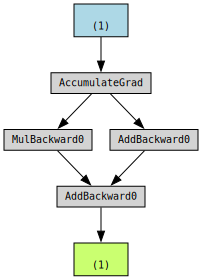

In [16]:
%pip install torchviz
from torchviz import make_dot
x=torch.tensor([1.], requires_grad=True)
# make_dot(x)
make_dot(x**2) # (1) 이라고 써있는 것은 shape을 나타냄
# make_dot(x**2+1)
# make_dot((x**2+1)**2)

y=2*x
z=3+x
r=y+z
make_dot(r)
# 파란(1)네모는 x, 초록(1)네모는 r

In [17]:
r.backward()
print(x.grad)

tensor([3.])
